In [234]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [235]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [236]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [237]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [238]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [239]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [240]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [241]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [242]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [243]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [244]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

Text(0.5, 0, 'Date')

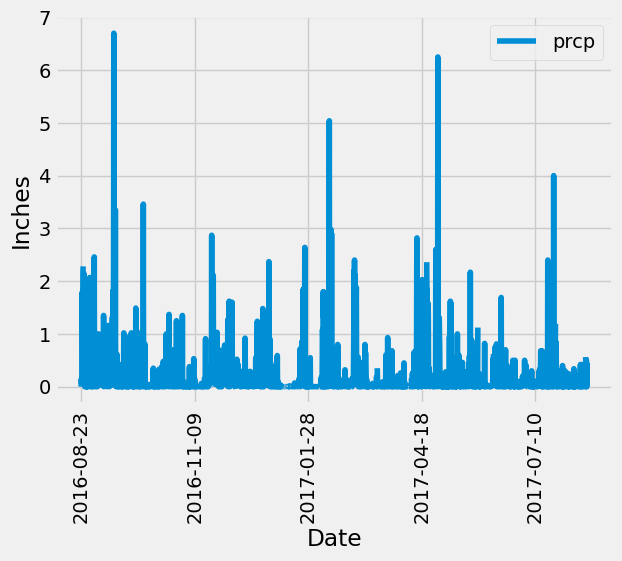

In [245]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Date range is 2016-08-23 through 2017-08-23

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data)
df.plot(y='prcp',x='date', rot=90)
plt.ylabel('Inches')
plt.xlabel('Date')
# Use Pandas Plotting with Matplotlib to plot the data


# Use Pandas to calculate the summary statistics for the precipitation data
df['prcp'].describe()

# Exploratory Station Analysis

In [247]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [248]:
session.query(func.count(measurement.id)).all()

[(19550,)]

In [249]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, func.count(measurement.id)]
 

session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [250]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(71.66378066378067,)]

In [251]:
session.query(measurement.tobs).filter(measurement.station == 'USC00519281').order_by(measurement.tobs.desc()).first()

(85.0,)

In [252]:
session.query(measurement.tobs).filter(measurement.station == 'USC00519281').order_by(measurement.tobs).first()

(54.0,)

Text(0.5, 0, 'Temperature')

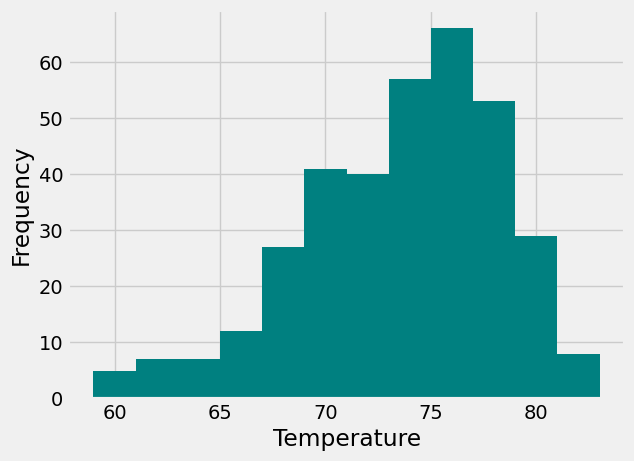

In [255]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data2 = session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.tobs.desc()).all()

#axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
plt.hist(data2, bins=12, histtype='barstacked', facecolor = 'teal')
plt.ylabel('Frequency')
plt.xlabel('Temperature')

<sqlalchemy.sql.functions.sum at 0x1d2f197ebb0; sum>

# Close Session

In [232]:
# Close Session
session.close()